<a href="https://colab.research.google.com/github/LKPushpaj/Analytical-Finanace/blob/master/MACD_method_Algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#this program uses the Moving Average Convergence /Divergence (MACD) crossover

In [20]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [28]:
stockStartDate = '2017-04-20'
#today = datetime.today().strftime('%Y-%m-%d')
end ='2017-08-24'

df = web.DataReader('AAPl', data_source='yahoo',start = stockStartDate, end=end)

In [42]:
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2017-04-20,35.730000,35.290001,35.305000,35.610001,93278400.0,33.930340,0.000000,0.000000,NaN,NaN
2017-04-21,35.669998,35.462502,35.610001,35.567501,69283600.0,33.889851,-0.003390,-0.000678,NaN,35.567501
2017-04-24,35.987499,35.794998,35.875000,35.910000,68537200.0,34.216194,0.021314,0.003720,35.91,NaN
2017-04-25,36.224998,35.967499,35.977501,36.132500,75486000.0,34.428196,0.058176,0.014611,NaN,NaN
2017-04-26,36.150002,35.845001,36.117500,35.919998,80164800.0,34.225719,0.069441,0.025577,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2017-08-18,39.875000,39.180000,39.465000,39.375000,109712400.0,37.820560,0.666326,0.670928,NaN,39.375000
2017-08-21,39.472500,38.777500,39.375000,39.302502,105474000.0,37.750916,0.606431,0.658028,NaN,NaN
2017-08-22,40.000000,39.505001,39.557499,39.945000,86418400.0,38.368046,0.603847,0.647192,NaN,NaN


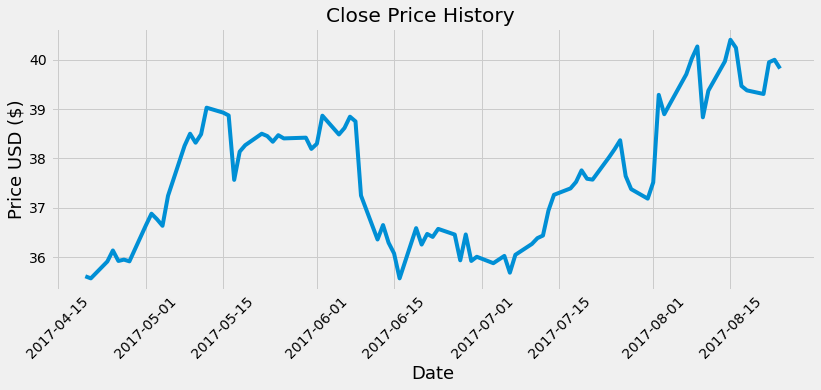

In [43]:
# Visually Show The Stock Price(s)
# Create the title
title = 'Close Price History    '
#Get the stocks
my_stocks = df
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot( my_stocks['Close'],  label='Close')#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45) 
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Price USD ($)',fontsize=18)
plt.show()

In [44]:
#Calculate the MACD and Signal Line indicators
#Calculate the Short Term Exponential Moving Average
ShortEMA = df.Close.ewm(span=12, adjust=False).mean() #AKA Fast moving average
#Calculate the Long Term Exponential Moving Average
LongEMA = df.Close.ewm(span=26, adjust=False).mean() #AKA Slow moving average
#Calculate the Moving Average Convergence/Divergence (MACD)
MACD = ShortEMA - LongEMA
#Calcualte the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

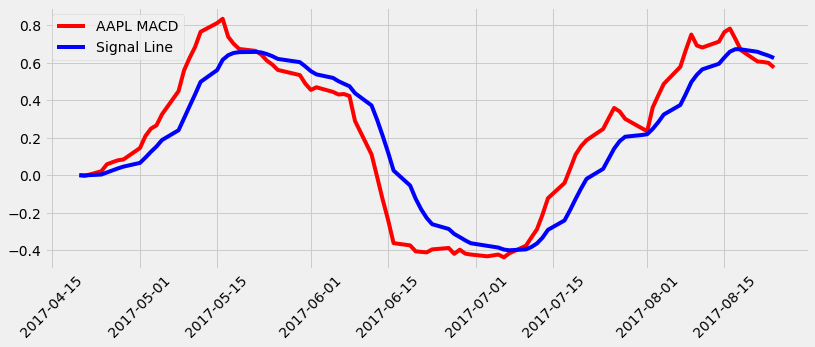

In [45]:
#Plot the chart
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='AAPL MACD', color = 'red')
plt.plot(df.index, signal, label='Signal Line', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

In [46]:
#Create new columns for the data frame 
df['MACD'] = MACD
df['Signal Line'] = signal
#Show the new data frame
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2017-04-20,35.730000,35.290001,35.305000,35.610001,93278400.0,33.930340,0.000000,0.000000,NaN,NaN
2017-04-21,35.669998,35.462502,35.610001,35.567501,69283600.0,33.889851,-0.003390,-0.000678,NaN,35.567501
2017-04-24,35.987499,35.794998,35.875000,35.910000,68537200.0,34.216194,0.021314,0.003720,35.91,NaN
2017-04-25,36.224998,35.967499,35.977501,36.132500,75486000.0,34.428196,0.058176,0.014611,NaN,NaN
2017-04-26,36.150002,35.845001,36.117500,35.919998,80164800.0,34.225719,0.069441,0.025577,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2017-08-18,39.875000,39.180000,39.465000,39.375000,109712400.0,37.820560,0.666326,0.670928,NaN,39.375000
2017-08-21,39.472500,38.777500,39.375000,39.302502,105474000.0,37.750916,0.606431,0.658028,NaN,NaN
2017-08-22,40.000000,39.505001,39.557499,39.945000,86418400.0,38.368046,0.603847,0.647192,NaN,NaN


In [47]:
def buy_sell(signal):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    #if MACD > signal line  then buy else sell
      if signal['MACD'][i] > signal['Signal Line'][i]:
        if flag != 1:
          sigPriceBuy.append(signal['Close'][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      elif signal['MACD'][i] < signal['Signal Line'][i]: 
        if flag != 0:
          sigPriceSell.append(signal['Close'][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [48]:
#Create buy and sell columns
x = buy_sell(df)
df['Buy_Signal_Price'] = x[0]
df['Sell_Signal_Price'] = x[1]
#Show the data frame
df

,High,Low,Open,Close,Volume,Adj Close,MACD,Signal Line,Buy_Signal_Price,Sell_Signal_Price
Date,,,,,,,,,,
2017-04-20,35.730000,35.290001,35.305000,35.610001,93278400.0,33.930340,0.000000,0.000000,NaN,NaN
2017-04-21,35.669998,35.462502,35.610001,35.567501,69283600.0,33.889851,-0.003390,-0.000678,NaN,35.567501
2017-04-24,35.987499,35.794998,35.875000,35.910000,68537200.0,34.216194,0.021314,0.003720,35.91,NaN
2017-04-25,36.224998,35.967499,35.977501,36.132500,75486000.0,34.428196,0.058176,0.014611,NaN,NaN
2017-04-26,36.150002,35.845001,36.117500,35.919998,80164800.0,34.225719,0.069441,0.025577,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2017-08-18,39.875000,39.180000,39.465000,39.375000,109712400.0,37.820560,0.666326,0.670928,NaN,39.375000
2017-08-21,39.472500,38.777500,39.375000,39.302502,105474000.0,37.750916,0.606431,0.658028,NaN,NaN
2017-08-22,40.000000,39.505001,39.557499,39.945000,86418400.0,38.368046,0.603847,0.647192,NaN,NaN


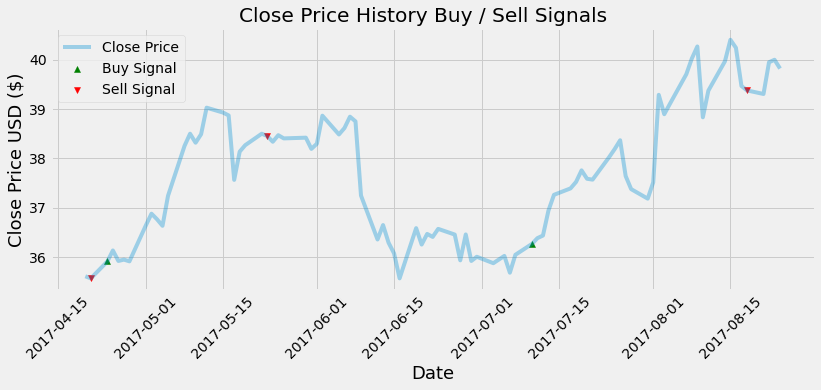

In [49]:
# Visually Show The Stock buy and sell signals
# Create the title 
title = 'Close Price History Buy / Sell Signals   '
#Get the stocks
my_stocks = df
  
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot( my_stocks['Close'],  label='Close Price', alpha = 0.35)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.xticks(rotation=45)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.legend( loc='upper left')
plt.show()